In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/net-migration-figures.csv')

In [6]:
df.columns

Index(['Year', 'All Nationalities', 'British', 'EU+', 'Non-EU+'], dtype='object')

In [10]:
df.drop('All Nationalities', inplace=True, axis=1)

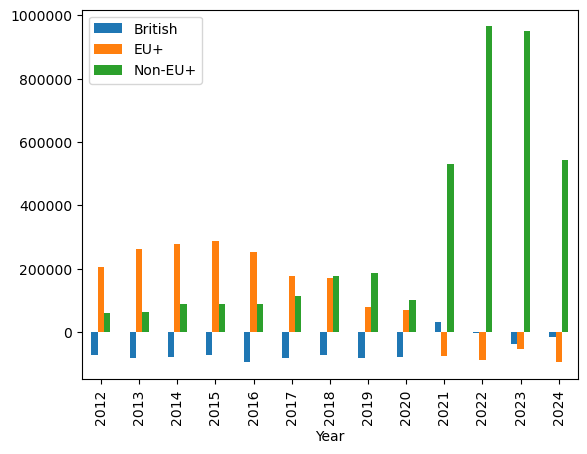

In [17]:
ax = df.plot(kind='bar', x='Year')
ax.ticklabel_format(style='plain', axis="y")

Notes from the plot:
1. British net migration has consistently been negative, only having a net positive in 2021 - possibly due to the COVID pandemic
2. EU net migration started descreasing after 2016 (Brexit) and has been negative since the COVID pandemic
3. Non-EU net migration rises slightly after 2016 (Brexit) and drastically after 2021 (COVID)

In [18]:
df_country = pd.read_csv('../data/immigration-by-country.csv')

In [19]:
df_country.head()

,Nationality,Year,All-reasons,Work,Study,Other
0,Indian,2021,150000,62000,77000,11000
1,Indian,2022,267000,116000,140000,11000
2,Indian,2023,277000,132000,136000,10000
3,Indian,2024,156000,68000,82000,7000
4,Pakistani,2021,34000,5000,13000,17000


In [26]:
df_india = df_country[df_country['Nationality'] == 'Indian']
df_india

,Nationality,Year,All-reasons,Work,Study,Other
0,Indian,2021,150000,62000,77000,11000
1,Indian,2022,267000,116000,140000,11000
2,Indian,2023,277000,132000,136000,10000
3,Indian,2024,156000,68000,82000,7000


In [32]:
df_india.drop('All-reasons', axis=1, inplace=True)

C:\Users\alecw\AppData\Local\Temp\ipykernel_18884\1951450030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india.drop('All-reasons', axis=1, inplace=True)


<Axes: xlabel='Year'>

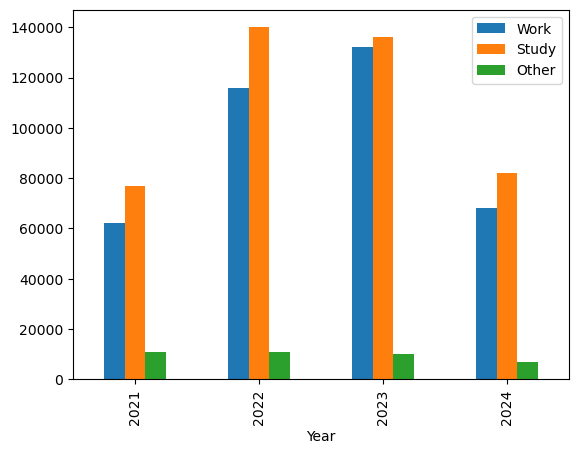

In [33]:
df_india.plot(kind='bar', x='Year')

C:\Users\alecw\AppData\Local\Temp\ipykernel_18884\2703533108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.drop('All-reasons', axis=1, inplace=True)


<Axes: xlabel='Year'>

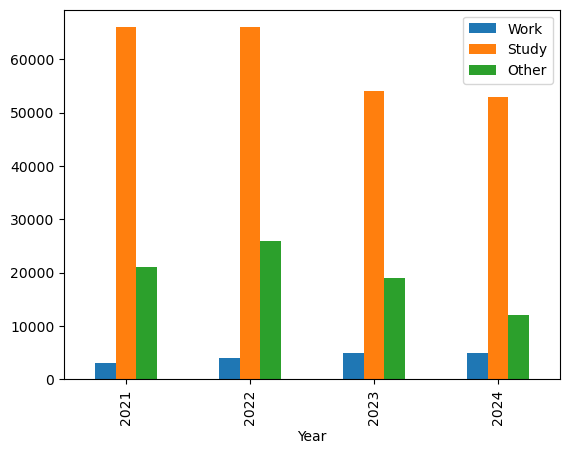

In [34]:
df_china = df_country[df_country['Nationality'] == 'Chinese']
df_china.drop('All-reasons', axis=1, inplace=True)
df_china.plot(kind='bar', x='Year')

Comparing Indian and Chinese figures:
1. Overall immigration seems to peak 2022-23 with a slight decline into 2024
2. Reasons for immigration are slightly different - Chinese immigrants are much more likely to be studying in the UK, Indian immigrants have roughly equal immigration for study and work

In [45]:
df_group = df_country.groupby('Year').sum().drop('Nationality', axis=1)
df_group

,All-reasons,Work,Study,Other
Year,,,,
2021,377000,98000,211000,70000
2022,762000,201000,362000,200000
2023,807000,347000,358000,107000
2024,469000,181000,214000,74000


<Axes: xlabel='Year'>

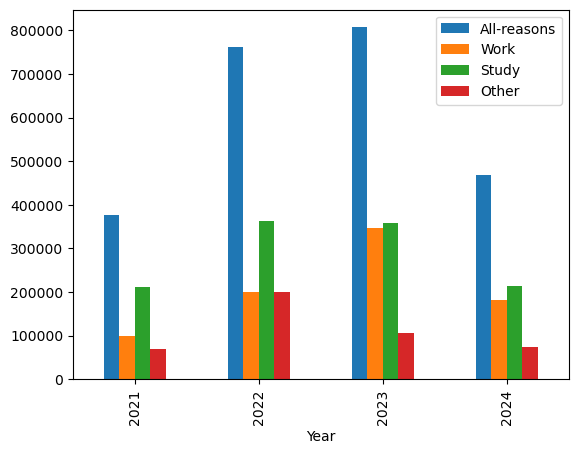

In [47]:
df_group.plot(kind='bar')

As seen in the plot:
1. We saw before that overall immigration numbers spiked in 2022 and have receded in 2024 - possibly a migration spike after COVID
2. The consistent main reason for immigration is study, with work-related immigration fluctuating

In [69]:
df_overall = df_country.drop(['Work', 'Study', 'Other'], axis=1)
df_overall = df_overall.sort_values(by=['All-reasons'], ascending=False).reset_index()

Text(0, 0.5, 'Immigration')

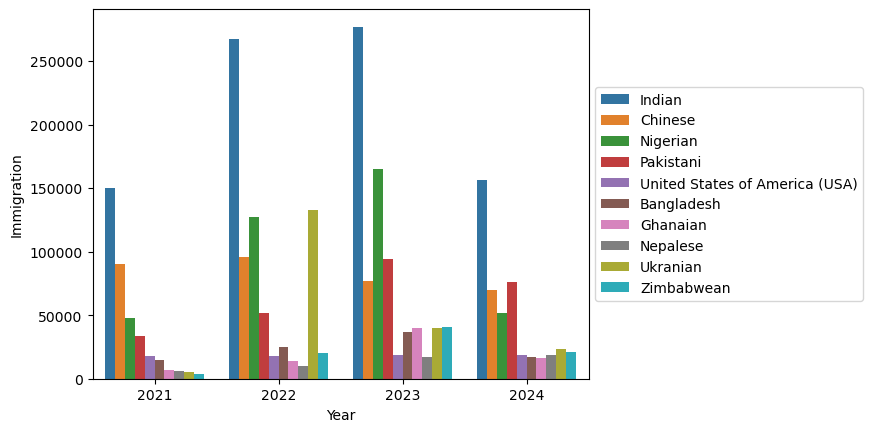

In [73]:
sns.barplot(data=df_overall, x='Year', y='All-reasons', hue='Nationality')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Immigration')

Notes from the plot:
1. Certain countries follow the pattern seen before - A spike in immigration in 2022-23 with a return to levels seen in 2021 (India, Nigeria, Pakistan, Bangladesh, Ghana, Zimbabwe)
2. There is a significant rise of Ukrainian immigrants in 2022 - likely due to the Russia-Ukraine war
3. Most of the top 10 nations of origin for immigrants are formerly British occupied, with the exception of Ukraine